In [23]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from models3D import upsample_vit_attention
from plotting_utils_torch import view_image_data

In [24]:
mask_path = "/home/diogommiranda/tese/masks/ROI_MASK.nii"
img = nib.load(mask_path)
volume = img.get_fdata(dtype=np.float32)
current_min = np.min(volume)
current_max = np.max(volume)
print(f"Calculated Min: {current_min}, Max: {current_max}")
volume = np.transpose(volume, (2, 1, 0)) # (D, H, W)
volume = np.expand_dims(volume, axis=0) # Add channel dimension
volume = np.expand_dims(volume, axis=0) # Add batch dimension
volume = torch.from_numpy(volume)
print(f"Shape after transpose: {volume.shape}")

Calculated Min: 0.0, Max: 1.0
Shape after transpose: torch.Size([1, 1, 91, 109, 91])


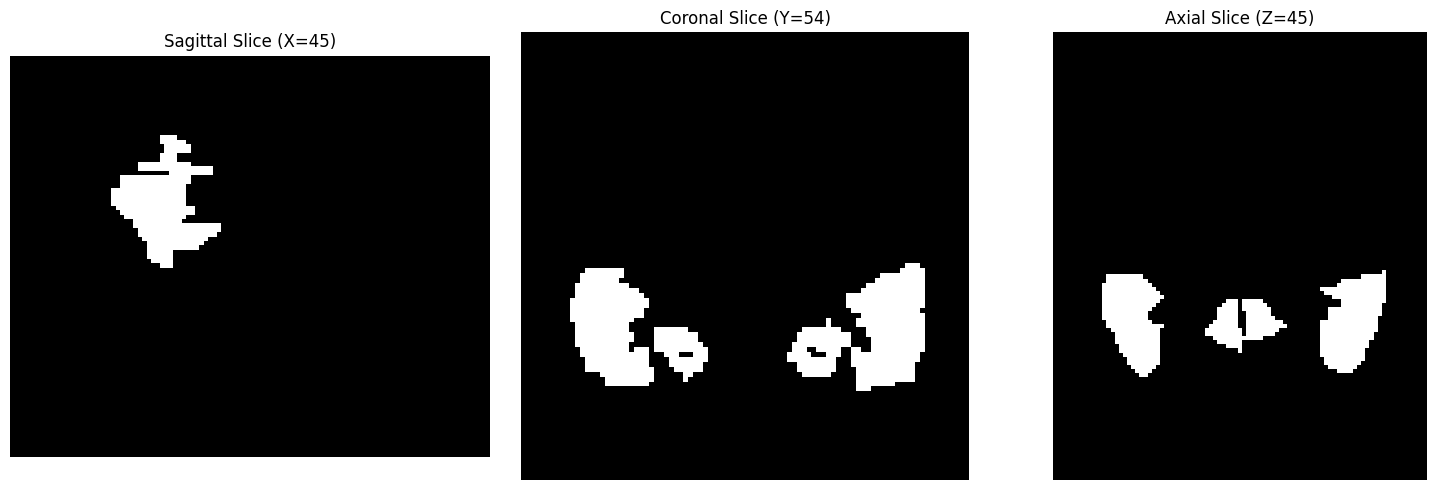

In [25]:
view_image_data(volume[0, 0, :, :, :])

In [ ]:
# Get the number of voxels outside the mask
num_voxels_outside_mask = (volume == 0).sum().item()
print(f"Number of voxels outside the mask: {num_voxels_outside_mask}")
# Get the number of voxels inside the mask
num_voxels_inside_mask = (volume == 1).sum().item()
print(f"Number of voxels inside the mask: {num_voxels_inside_mask}")

# print the percentage of non-zero values in the volume
non_zero_percentage = (volume != 0).float().mean().item() * 100
print(f"Percentage of non-zero values: {non_zero_percentage:.2f}%")

Number of voxels outside the mask: 865245
Number of voxels inside the mask: 37384
Percentage of non-zero values: 4.14%


In [ ]:
num_voxels = volume.numel()
print(f"Number of voxels in the volume: {num_voxels}")
num_non_zero_voxels = (volume != 0).sum().item()
print(f"Number of non-zero voxels in the volume: {num_non_zero_voxels}")

Number of voxels in the volume: 902629
Number of non-zero voxels in the volume: 37384


In [6]:
roi_scores = F.interpolate(
    input = volume,
    mode = 'area',
    size = (6, 7, 6)
)
print(roi_scores.shape)
roi_scores = roi_scores.squeeze(0).squeeze(0)  # Remove batch and channel dimensions
print(roi_scores.shape)

torch.Size([1, 1, 6, 7, 6])
torch.Size([6, 7, 6])


In [7]:
roi_min = torch.min(roi_scores)
roi_max = torch.max(roi_scores)
print(f"ROI Min: {roi_min.item()}, ROI Max: {roi_max.item()}")

ROI Min: 0.0, ROI Max: 0.572021484375


In [8]:
token_roi_scores = roi_scores.flatten()
print(f"Token ROI Scores Shape: {token_roi_scores.shape}")

Token ROI Scores Shape: torch.Size([252])


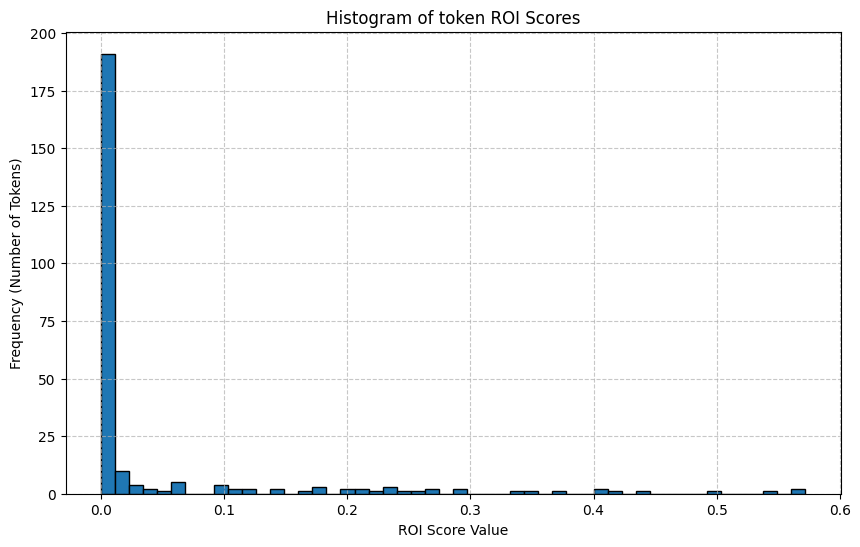

In [ ]:
# Plotting the histogram of token ROI scores
plt.figure(figsize=(10, 6))
plt.hist(token_roi_scores.cpu().numpy(), bins=50, edgecolor='black')
plt.title("Histogram of token ROI Scores")
plt.xlabel("ROI Score Value")
plt.ylabel("Frequency (Number of Tokens)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Note: 
- Only 81 tokens have non-zero scores
- Only 63 tokens have score greater than 0.01
- Only 45 tokens have score greater than 0.05
- Only 37 tokens have score greater than 0.1
- Only 11 tokens have score greater than 0.3